<a href="https://colab.research.google.com/github/trankhanhduy20146093/TRI_TUE_NHAN_TAO/blob/main/Food_Suggestion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 11.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=8fbb48e5ebb8e45e2e362e62a37a1d195d4b843f488d921a382934daab5f95ac
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


5.429773681717579


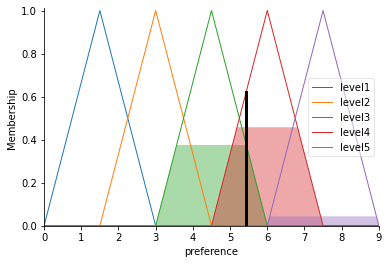

In [21]:
#Adaptive Food Suggestion Engine by Fuzzy Logic

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

taste = ctrl.Antecedent(np.arange(0,10.1,0.1),'taste')
environment = ctrl.Antecedent(np.arange(0,10.1,0.1),'environment')
budget = ctrl.Antecedent(np.arange(0,9.1,0.1),'budget')
user_review = ctrl.Antecedent(np.arange(0,5.1,0.1),'user_review')
location = ctrl.Antecedent(np.arange(0,3.1,0.1),'location')

preference= ctrl.Consequent(np.arange(0,9.1,0.1),'preference')

taste['less']=fuzz.gaussmf(taste.universe,0,2)
taste['medium']=fuzz.gaussmf(taste.universe,5,2)
taste['high']=fuzz.gaussmf(taste.universe,10,2)

environment['imformal']=fuzz.gaussmf(environment.universe,0,2)
environment['causual']=fuzz.gaussmf(environment.universe,5,2)
environment['formal']=fuzz.gaussmf(environment.universe,10,2)

budget['less preferred']=fuzz.gaussmf(budget.universe,7.5,1)
budget['preferred']=fuzz.gaussmf(budget.universe,4.5,1)
budget['more preferred']=fuzz.gaussmf(budget.universe,1.5,1)

user_review['more preferred']=fuzz.gaussmf(user_review.universe,4.25,0.5)
user_review['preferred']=fuzz.gaussmf(user_review.universe,2.5,0.5)
user_review['less preferred']=fuzz.gaussmf(user_review.universe,0.75,0.5)

location['close']=fuzz.gaussmf(location.universe,0.5,0.5)
location['near']=fuzz.gaussmf(location.universe,1.5,0.5)
location['far']=fuzz.gaussmf(location.universe,2.5,0.5)

preference['level1']=fuzz.trimf(preference.universe,[0,1.5,3])
preference['level2']=fuzz.trimf(preference.universe,[1.5,3,4.5])
preference['level3']=fuzz.trimf(preference.universe,[3,4.5,6])
preference['level4']=fuzz.trimf(preference.universe,[4.5,6,7.5])
preference['level5']=fuzz.trimf(preference.universe,[6,7.5,9])

#rule
rule = []
#bỏ list[0] do mình sẽ lấy giá trị từ 1 -> 3
list_value_taste = [' ','less','medium','high']
list_value_environment = [' ','imformal','causual','formal']
list_value_budget=[' ','less preferred','preferred','more preferred']
list_value_user_review = [' ','less preferred','preferred','more preferred']

#do far thì sẽ cho điểm ít = 1 nên đảo vị trí
list_value_location = [' ','far','near','close']

list_value_preference=['level1','level2','level3','level4','level5']

for index_taste in range(1,4):
  for index_environment in range (1,4):
    for index_budget in range(1,4):
      for index_user_review in range (1,4):
        for index_location in range (1,4):
          i = index_budget + index_environment + index_location + index_taste + index_user_review
          if(i <=3): k=0
          if(3< i <=6): k=1
          if(6< i <=9): k=2
          if(9< i <=12):k=3
          if(12< i <=15):k=4
          rule.append(ctrl.Rule(taste[list_value_taste[index_taste]]&environment[list_value_environment[index_environment]]
                                &budget[list_value_budget[index_budget]]&user_review[list_value_user_review[index_user_review]]
                                &location[list_value_location[index_location]],preference[list_value_preference[k]]))

preferencing_ctrl = ctrl.ControlSystem(rule)
preferencing_slt=ctrl.ControlSystemSimulation(preferencing_ctrl)

preferencing_slt.inputs({'taste': 7.8, 'environment': 7.5,'budget':7,'user_review':4.5,'location':2.1})


preferencing_slt.compute()
print(preferencing_slt.output['preference'])

preference.view(sim=preferencing_slt)
